In [1]:
%pylab qt
from scipy.integrate import odeint
import pandas

Populating the interactive namespace from numpy and matplotlib


# Estimation de l'incertitude sur un ajustement linéaire

In [66]:
# Données
g = 9.81
m = np.array([10,20,50,100,150,200,250,300,350,400])*1e-3
delta_m = 20e-3 # imprécision sur la mesure de m (kg)
l = np.array([0,5,13,26,39,55,67,84,100,110])*1e-3
delta_l = 5e-3 # imprecision sur la mesure de T (s)

plt.xlabel("Masse (kg)")
plt.ylabel("Alongement (m)")
plt.title("Vérification de la loi de Hooke")
plt.plot(m,l,"oC0")
plt.xlim(-.05,.45)
plt.ylim(-.01,.13)

(-0.01, 0.13)

In [67]:
plt.errorbar(m, l, xerr=delta_m, yerr=delta_l, fmt="o",capsize=2)

<ErrorbarContainer object of 3 artists>

In [68]:
a, b = np.polyfit(m,l,1)
plt.plot(m,a*m+b, "C0")
print("coefficient directeur : {:.2f} m/kg".format(a))

coefficient directeur : 0.28 m/kg


In [69]:
alpha = .5
m_sim = m + np.random.uniform(-delta_m,delta_m,len(m))
l_sim = l + np.random.uniform(-delta_l,delta_l,len(l))
plt.plot(m_sim,l_sim,".k", alpha=alpha)

In [70]:
N = 5
for n in range(N):
    m_sim = m + np.random.uniform(-delta_m,delta_m,len(m))
    l_sim = l + np.random.uniform(-delta_l,delta_l,len(l))
    plt.plot(m_sim,l_sim,".k", alpha=alpha/np.sqrt(N))

In [71]:
N = 100
for n in range(N):
    m_sim = m + np.random.uniform(-delta_m,delta_m,len(m))
    l_sim = l + np.random.uniform(-delta_l,delta_l,len(l))
    plt.plot(m_sim,l_sim,".k", alpha=alpha/np.sqrt(N))

In [72]:
N = 1000
for n in range(N):
    m_sim = m + np.random.uniform(-delta_m,delta_m,len(m))
    l_sim = l + np.random.uniform(-delta_l,delta_l,len(l))
    plt.plot(m_sim,l_sim,".k", alpha=alpha/np.sqrt(N))

In [73]:
tab_a, tab_b = [], []
for n in range(N):
    m_sim = m + np.random.uniform(-delta_m,delta_m,len(m))
    l_sim = l + np.random.uniform(-delta_l,delta_l,len(l))
    a, b = np.polyfit(m_sim,l_sim,1)
    tab_a.append(a) # coefficient directeur
    tab_b.append(b) # ordonnée à l'origine
    plt.plot(m_sim,a*m_sim+b, "k", alpha=alpha/100)

In [74]:
a, b = np.mean(tab_a), np.mean(tab_b)
plt.plot(m,a*m+b, "white")
print("coefficient directeur : {:.2f} m/kg".format(a))
print("incertitude type      : {:.2f} m/kg".format(np.std(tab_a)))

coefficient directeur : 0.28 m/kg
incertitude type      : 0.01 m/kg


# Préparation

34.572796558161734 0.3427363962527853


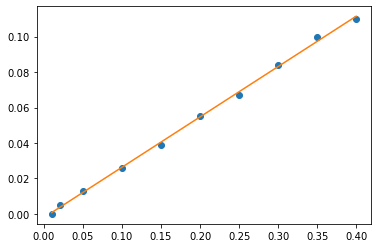

In [4]:
# Mesure statique
g = 9.81
m = np.array([10,20,50,100,150,200,250,300,350,400])*1e-3
l = np.array([0,5,13,26,39,55,67,84,100,110])*1e-3

tab_a, tab_b = [], []
for n in range(10000):
    delta_m = 1e-3
    delta_l = 2e-3
    
    m_sim = m + np.random.uniform(-delta_m,delta_m,len(m))
    l_sim = l + np.random.uniform(-delta_l,delta_l,len(l))
    a, b = np.polyfit(m_sim,l_sim,1)
    tab_a.append(a)
    tab_b.append(b)

a = mean(tab_a)
b = mean(tab_b)
plt.plot(m,l,"o")
plt.plot(m,a*m+b)

k = g/np.array(tab_a)
print(mean(k), np.std(k))

In [2]:
# Mesure dynamique

# Mesure 1
T = 0.39 
delta_T = 0.1/7
m = 125.2*1e-3
delta_m = .1e-3

T_sim = T + np.random.uniform(-delta_T,delta_T,10000)
m_sim = m + np.random.uniform(-delta_m,delta_m,10000)
k = 4 * np.pi**2 / T_sim**2 * m_sim
print(mean(k),std(k))

# Mesure 2
T = 1.82/3
delta_T = 0.1/3
m = (125.2 + 200)*1e-3
delta_m = .1e-3

T_sim = T + np.random.uniform(-delta_T,delta_T,10000)
m_sim = m + np.random.uniform(-delta_m,delta_m,10000)
k = 4 * np.pi**2 / T_sim**2 * m_sim

print(mean(k),std(k))

NameError: name 'np' is not defined

# Acquisition masse ressort

In [93]:
folder = "../tp/tp10/"
filename = folder + "masse_ressort.xls"
df = pandas.read_excel(filename, sheet_name="Raw Data")

t = df["Time (s)"]
y = df["Acceleration y (m/s^2)"]

plt.clf()
plt.plot(t,y-np.mean(y), lw=.1, label="Mesures")
#plt.plot(t, 5*np.exp(-t/220))

def oscillateur_lin(V,t):
    omega0 = 2*np.pi/.5251
    Q = 500
    x, v = V
    dx = v
    dv = -omega0**2 * x - omega0/Q*v
    return [dx,dv]

def oscillateur_quad(V,t):
    omega0 = 2*np.pi/.5251
    Q = 3150
    a = .0003
    x, v = V
    dx = v
    dv = -omega0**2 * x - omega0/Q*v - a * np.sign(v) * v**2
    return [dx,dv]

V0 = [8.1,0]
V = odeint(oscillateur_lin,V0,t)
z = V[:,0]
plt.plot(t,z,lw=.1, label="Sim (f lin)")

V = odeint(oscillateur_quad,V0,t)
z = V[:,0]
plt.plot(t,z,lw=.1, label="Sim (f quad)")

plt.xlabel("Temps (s)")
plt.ylabel("Accélération ($\mathrm{m \cdot s^{-2} }$)")
plt.title("Évolution libre d'un système masse ressort")
plt.legend()

In [33]:
a = .0038
b = .00028

In [59]:
2*np.pi/.5251 / 0.0038

3148.8665352863045